### LSE Data Analytics Online Career Accelerator 

# DA301:  Advanced Analytics for Organisational Impact

## Assignment template

### Scenario
You are a data analyst working for Turtle Games, a game manufacturer and retailer. They manufacture and sell their own products, along with sourcing and selling products manufactured by other companies. Their product range includes books, board games, video games and toys. They have a global customer base and have a business objective of improving overall sales performance by utilising customer trends. In particular, Turtle Games wants to understand: 
- how customers accumulate loyalty points (Week 1)
- how useful are remuneration and spending scores data (Week 2)
- can social data (e.g. customer reviews) be used in marketing campaigns (Week 3)
- what is the impact on sales per product (Week 4)
- the reliability of the data (e.g. normal distribution, Skewness, Kurtosis) (Week 5)
- if there is any possible relationship(s) in sales between North America, Europe, and global sales (Week 6).

# Week 1 assignment: Linear regression using Python
The marketing department of Turtle Games prefers Python for data analysis. As you are fluent in Python, they asked you to assist with data analysis of social media data. The marketing department wants to better understand how users accumulate loyalty points. Therefore, you need to investigate the possible relationships between the loyalty points, age, remuneration, and spending scores. Note that you will use this data set in future modules as well and it is, therefore, strongly encouraged to first clean the data as per provided guidelines and then save a copy of the clean data for future use.

## Instructions
1. Load and explore the data.
    1. Create a new DataFrame (e.g. reviews).
    2. Sense-check the DataFrame.
    3. Determine if there are any missing values in the DataFrame.
    4. Create a summary of the descriptive statistics.
2. Remove redundant columns (`language` and `platform`).
3. Change column headings to names that are easier to reference (e.g. `renumeration` and `spending_score`).
4. Save a copy of the clean DataFrame as a CSV file. Import the file to sense-check.
5. Use linear regression and the `statsmodels` functions to evaluate possible linear relationships between loyalty points and age/renumeration/spending scores to determine whether these can be used to predict the loyalty points.
    1. Specify the independent and dependent variables.
    2. Create the OLS model.
    3. Extract the estimated parameters, standard errors, and predicted values.
    4. Generate the regression table based on the X coefficient and constant values.
    5. Plot the linear regression and add a regression line.
6. Include your insights and observations.

## 1. Load and explore the data

In [50]:

# Import necessary libraries and stats models.

import numpy as np
import pandas as pd
import pylab as py
import sklearn

import matplotlib.pyplot as plt
import seaborn as sns

import scipy as scipy
from scipy import stats
from sklearn import metrics
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm 
from statsmodels.formula.api import ols
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
# Load the Reviews CSV file(s) as rv.
rv = pd.read_csv('turtle_reviews.csv') 

# View the DataFrame.
rv.head()

gender  age  remuneration (k£)  spending_score (1-100)  loyalty_points  \
0    Male   18              12.30                      39             210   
1    Male   23              12.30                      81             524   
2  Female   22              13.12                       6              40   
3  Female   25              13.12                      77             562   
4  Female   33              13.94                      40             366   

  education language platform  product  \
0  graduate       EN      Web      453   
1  graduate       EN      Web      466   
2  graduate       EN      Web      254   
3  graduate       EN      Web      263   
4  graduate       EN      Web      291   

                                              review  \
0  When it comes to a DM's screen, the space on t...   
1  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2  Nice art, nice printing.  Why two panels are f...   
3  Amazing buy! Bought it as a gift for our new d...   
4  As my review of GF9's previous screens these w...   

                                             summary  
0  The fact that 50% of this space is wasted on a...  
1  Another worthless Dungeon Master's screen from...  
2                    pretty, but also pretty useless  
3                                         Five Stars  
4                                         Money trap

In [3]:
# Check for missing values
rv.isna().sum()

gender                    0
age                       0
remuneration (k£)         0
spending_score (1-100)    0
loyalty_points            0
education                 0
language                  0
platform                  0
product                   0
review                    0
summary                   0
dtype: int64

In [4]:
# Check for duplicated entries.
rv[rv.duplicated()]

Empty DataFrame
Columns: [gender, age, remuneration (k£), spending_score (1-100), loyalty_points, education, language, platform, product, review, summary]
Index: []

In [5]:
# No missing values and no duplicates
# Explore the data.
rv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  2000 non-null   object 
 1   age                     2000 non-null   int64  
 2   remuneration (k£)       2000 non-null   float64
 3   spending_score (1-100)  2000 non-null   int64  
 4   loyalty_points          2000 non-null   int64  
 5   education               2000 non-null   object 
 6   language                2000 non-null   object 
 7   platform                2000 non-null   object 
 8   product                 2000 non-null   int64  
 9   review                  2000 non-null   object 
 10  summary                 2000 non-null   object 
dtypes: float64(1), int64(4), object(6)
memory usage: 172.0+ KB


In [6]:
# Descriptive statistics.
rv.describe()

age  remuneration (k£)  spending_score (1-100)  loyalty_points  \
count  2000.000000        2000.000000             2000.000000     2000.000000   
mean     39.495000          48.079060               50.000000     1578.032000   
std      13.573212          23.123984               26.094702     1283.239705   
min      17.000000          12.300000                1.000000       25.000000   
25%      29.000000          30.340000               32.000000      772.000000   
50%      38.000000          47.150000               50.000000     1276.000000   
75%      49.000000          63.960000               73.000000     1751.250000   
max      72.000000         112.340000               99.000000     6847.000000   

            product  
count   2000.000000  
mean    4320.521500  
std     3148.938839  
min      107.000000  
25%     1589.250000  
50%     3624.000000  
75%     6654.000000  
max    11086.000000

## 2. Drop columns

In [7]:
# Drop unnecessary columns platform and language as they only have one value
rv1=rv.drop(['platform', 'language'], axis=1)

rv1.columns

Index(['gender', 'age', 'remuneration (k£)', 'spending_score (1-100)',
       'loyalty_points', 'education', 'product', 'review', 'summary'],
      dtype='object')

## 3. Rename columns

In [8]:
# Rename the column headers.

rv1.rename(columns = {'remuneration (k£)':'remuneration', 'spending_score (1-100)':'spending_score'}, 
           inplace = True)
# View column names.

rv1.columns

Index(['gender', 'age', 'remuneration', 'spending_score', 'loyalty_points',
       'education', 'product', 'review', 'summary'],
      dtype='object')

## 4. Save the DataFrame as a CSV file

In [9]:
# Create a CSV file as output.
rv1.to_csv('Reviews_cleaned.csv', header=True, index=False)

In [10]:
# Import new CSV file with Pandas.
rvc=pd.read_csv('Reviews_cleaned.csv')

# View DataFrame.
rvc

gender  age  remuneration  spending_score  loyalty_points education  \
0       Male   18         12.30              39             210  graduate   
1       Male   23         12.30              81             524  graduate   
2     Female   22         13.12               6              40  graduate   
3     Female   25         13.12              77             562  graduate   
4     Female   33         13.94              40             366  graduate   
...      ...  ...           ...             ...             ...       ...   
1995  Female   37         84.46              69            4031       PhD   
1996  Female   43         92.66               8             539       PhD   
1997    Male   34         92.66              91            5614  graduate   
1998    Male   34         98.40              16            1048       PhD   
1999    Male   32         92.66               8             479       PhD   

      product                                             review  \
0         453  When it comes to a DM's screen, the space on t...   
1         466  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2         254  Nice art, nice printing.  Why two panels are f...   
3         263  Amazing buy! Bought it as a gift for our new d...   
4         291  As my review of GF9's previous screens these w...   
...       ...                                                ...   
1995      977  The perfect word game for mixed ages (with Mom...   
1996      979  Great game.  Did not think I would like it whe...   
1997     1012  Great game for all.........\nKeeps the mind ni...   
1998     1031                                          fun game!   
1999      453  This game is fun. A lot like scrabble without ...   

                                                summary  
0     The fact that 50% of this space is wasted on a...  
1     Another worthless Dungeon Master's screen from...  
2                       pretty, but also pretty useless  
3                                            Five Stars  
4                                            Money trap  
...                                                 ...  
1995     The perfect word game for mixed ages (with Mom  
1996                                          Super fun  
1997                                         Great Game  
1998                                         Four Stars  
1999                                     Love this game  

[2000 rows x 9 columns]

## 5. Linear regression

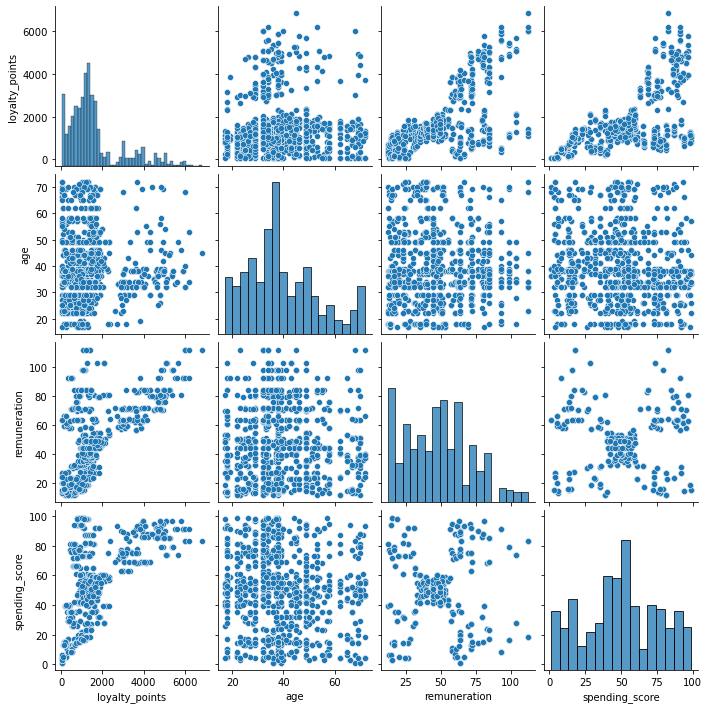

In [11]:
# Visualise the relationship between loyalty_points and age/remuneration/spending scores BEFORE running the regressions
sns.pairplot(rvc[['loyalty_points','age','remuneration','spending_score']])

# Observation 1: Focusing on the first row, 'loyalty_points' seems to have a stronger correlation with 'remuneration',
#'spending_score'. But the graphs suggest potential heteroskedasticity. Its relationship with 'age' looks weak.

# Observation 2: There doesn't appear to be linear relationship between the independent variables 'age','remuneration'
# and 'spending_score', which suggests multicollinearity might not be an issue. However there is an obvious cluster
# in the middle if we look at the plot of 'remuneration' vs 'spending_score'.


### 5a) spending vs loyalty

In [12]:
# Independent variable.
x = rvc['spending_score'].values.reshape(-1,1)

# Dependent variable.
y = rvc['loyalty_points'].values.reshape(-1,1)

# OLS model and summary.
SLR1=ols('y ~ x', data=rvc).fit()
SLR1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     1648.
Date:                Fri, 03 Mar 2023   Prob (F-statistic):          2.92e-263
Time:                        21:40:16   Log-Likelihood:                -16550.
No. Observations:                2000   AIC:                         3.310e+04
Df Residuals:                    1998   BIC:                         3.312e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -75.0527     45.931     -1.634      0.102    -165.129      15.024
x             33.0617      0.814     40.595      0.000      31.464      34.659
==============================================================================
Omnibus:                      126.554   Durbin-Watson:                   1.191
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              260.528
Skew:                           0.422   Prob(JB):                     2.67e-57
Kurtosis:                       4.554   Cond. No.                         122.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
# Extract the estimated parameters.
# x coef: 33.0617.
# Constant coef: -75.0527.
# R-sq: 0.452.

# Extract the standard errors.
# p-values of F-stat and x coef are both less than 0.05 - i.e. the model and x coef are statistically significant.

# Set the X coefficient and the constant to generate the regression table.  
# Predict the y values.
y_pred= -75.0527 + 33.0617 * x

# View the output.
y_pred

array([[1214.3536],
       [2602.945 ],
       [ 123.3175],
       ...,
       [2933.562 ],
       [ 453.9345],
       [ 189.4409]])

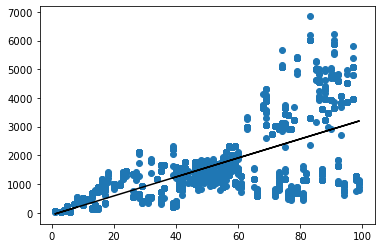

In [14]:
# Plot the graph with a regression line.
plt.scatter(x, y)
plt.plot(x, y_pred, color='black')

# Early sign of heteroscedasticity.

### 5b) remuneration vs loyalty

In [15]:
# Independent variable.
x = rvc['remuneration'].values.reshape(-1,1)

# Dependent variable.
y = rvc['loyalty_points'].values.reshape(-1,1)

# OLS model and summary.
SLR2=ols('y ~ x', data=rvc).fit()
SLR2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     1222.
Date:                Fri, 03 Mar 2023   Prob (F-statistic):          2.43e-209
Time:                        21:40:16   Log-Likelihood:                -16674.
No. Observations:                2000   AIC:                         3.335e+04
Df Residuals:                    1998   BIC:                         3.336e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -65.6865     52.171     -1.259      0.208    -168.001      36.628
x             34.1878      0.978     34.960      0.000      32.270      36.106
==============================================================================
Omnibus:                       21.285   Durbin-Watson:                   3.622
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.715
Skew:                           0.089   Prob(JB):                     1.30e-07
Kurtosis:                       3.590   Cond. No.                         123.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
# Extract the estimated parameters.
# x coef: 34.1878.
# Constant coef: -65.6865.
# R-sq: 0.380.

# Extract the standard errors.
# p-values of F-stat and x coef are both less than 0.05 - i.e. the model and x coef are statistically significant.

# Set the X coefficient and the constant to generate the regression table.  
# Predict the y values.
y_pred= -65.6865 + 34.1878 * x

# View the output.
y_pred


array([[ 354.82344 ],
       [ 354.82344 ],
       [ 382.857436],
       ...,
       [3102.155048],
       [3298.39302 ],
       [3102.155048]])

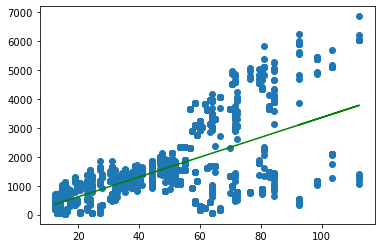

In [17]:
# Plot the graph with a regression line.
plt.scatter(x, y)
plt.plot(x, y_pred, color='green')

# Early sign of heteroscedasticity.

### 5c) age vs loyalty

In [18]:
# Independent variable.
x = rvc['age'].values.reshape(-1,1)

# Dependent variable.
y = rvc['loyalty_points'].values.reshape(-1,1)

# OLS model and summary.
SLR3=ols('y ~ x', data=rvc).fit()
SLR3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.606
Date:                Fri, 03 Mar 2023   Prob (F-statistic):             0.0577
Time:                        21:40:16   Log-Likelihood:                -17150.
No. Observations:                2000   AIC:                         3.430e+04
Df Residuals:                    1998   BIC:                         3.431e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1736.5177     88.249     19.678      0.000    1563.449    1909.587
x             -4.0128      2.113     -1.899      0.058      -8.157       0.131
==============================================================================
Omnibus:                      481.477   Durbin-Watson:                   2.277
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              937.734
Skew:                           1.449   Prob(JB):                    2.36e-204
Kurtosis:                       4.688   Cond. No.                         129.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
# Extract the estimated parameters.
# x coef: -4.0128.
# Constant coef: -1736.5177.
# R-sq: 0.002.

# Extract the standard errors.
# p-values of F-stat and x coef are both > 0.05. Age doesn't seem to be a good explanatory variable for loyalty in a linear way.


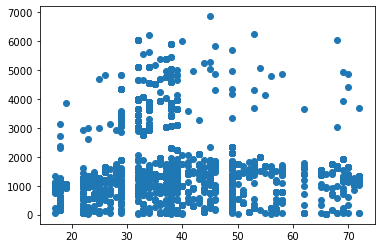

In [20]:
# Given the very low R-sq, insignificant x coef. We conclude that statistically loyalty and age do not 
# have a linear relationship. This confirms our visual inspection above. 

# Take a closer look with a scatter plot:
plt.scatter(x, y)


### Multiple linear regression

In [43]:
# Spending and remuneration were statisitcally significant in explaining loyalty in the simple linear regression models.
# However both models had low R-sq. 
# We will try a multiple linear regression with both spending and remueration as independent variables.

# Define the dependent variable.
y = rvc['loyalty_points']

# Define the independent variable, which now has two elements.
X = rvc[['remuneration','spending_score']]

# Pass linear regression through OLS methods.
mlr = ols('y ~ remuneration+spending_score', data = rvc).fit()

# Print the regression table.
mlr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     4770.
Date:                Fri, 03 Mar 2023   Prob (F-statistic):               0.00
Time:                        21:45:49   Log-Likelihood:                -15398.
No. Observations:                2000   AIC:                         3.080e+04
Df Residuals:                    1997   BIC:                         3.082e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -1700.3051     35.740    -47.575      0.000   -1770.396   -1630.214
remuneration      33.9795      0.517     65.769      0.000      32.966      34.993
spending_score    32.8927      0.458     71.845      0.000      31.995      33.791
==============================================================================
Omnibus:                        4.723   Durbin-Watson:                   3.477
Prob(Omnibus):                  0.094   Jarque-Bera (JB):                4.650
Skew:                           0.103   Prob(JB):                       0.0978
Kurtosis:                       3.115   Cond. No.                         220.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:
# Checking the value of R-squared, intercept and coefficients.
print("R-squared: ", mlr.score(X, y))
print("Intercept: ", mlr.intercept_)
print("Coefficients:")
list(zip(X, mlr.coef_))

R-squared:  0.826913470198926
Intercept:  -1700.305097014438
Coefficients:


[('remuneration', 33.97949882180282), ('spending_score', 32.89269468782101)]

In [ ]:
# The results look good with p-values of F-stat and both independent variables < 0.05, and R-sq at 82.7%.
# However recall the pair-wise plots we did earlier, there seems to be a cluster of values between spending and remuneration suggesting a relationship. This is worth checking.

In [46]:
# Check multicollinearity.

X_temp = sm.add_constant(X)

print(X_temp.values)
print(X_temp.values.shape[1])

# Create an empty DataFrame. 
vif = pd.DataFrame()

# Calculate the VIF for each value.
vif['VIF Factor'] = [variance_inflation_factor(X_temp.values,
                                               i) for i in range(X_temp.values.shape[1])]

# Create the feature columns.
vif['features'] = X_temp.columns

# Print the values to one decimal points.
print(vif.round(1))

#VIF Factor are both 1 suggesting low multicollinearity.

[[ 1.   12.3  39.  ]
 [ 1.   12.3  81.  ]
 [ 1.   13.12  6.  ]
 ...
 [ 1.   92.66 91.  ]
 [ 1.   98.4  16.  ]
 [ 1.   92.66  8.  ]]
3
   VIF Factor        features
0         9.0           const
1         1.0    remuneration
2         1.0  spending_score


In [56]:
# Check for heteroscedasticity
test = sms.het_breuschpagan(mlr.resid, mlr.model.exog)
labels = ['LM stat', 'LM Test p-value', 'F-stat', 'F-test p-value']
print(dict(zip(labels, test)))

# Both p-values are extremely low, suggesting heteroscedasticity or a flawed model.
# This confirms what we observed in the plots early on - the variance of loyalty increases 
# as spending or remueration increases. This suggests some treatment of the variables may be needed.

{'LM stat': 53.726566730469386, 'LM Test p-value': 2.1548858465062463e-12, 'F-stat': 27.563432744521567, 'F-test p-value': 1.554526362973394e-12}


## 6. Observations and insights

***Your observations here...***






In [ ]:
# Visual Observation 1: 'loyalty_points' seems to have a stronger correlation with 'remuneration',
#'spending_score'. But the graphs suggest potential heteroskedasticity. Its relationship with 'age' looks weak.

# Visual Observation 2: There doesn't appear to be linear relationship between the independent variables 'age','remuneration'
# and 'spending_score', which suggests multicollinearity might not be an issue. 

# Visual Observation 3: However there is an obvious cluster in the middle when we look at the plot of 'remuneration' vs 'spending_score'.

# Insights from the simple linear models:
# 1. in the simpe linear models for spending vs loyalty and remuneration vs loyalty, p-values of F-stat and x coef are both 
# less than 0.05 - i.e. the model and x coef are statistically significant. However there are signs of heteroscedasticity from the plots.
# 2. in the age vs loyalty model, p-values of F-stat and x coef are both > 0.05. Age doesn't seem to be a good explanatory variable for loyalty in a linear way.
# 3. However the models had low R-sq individually. I decided to try a multiple linear regression with both spending and remueration as independent variables.

# Insights from the multiple linear model:
# 1. The results look good with p-values of F-stat and both independent variables < 0.05, and R-sq at 82.7%.
# 2. However in the heteroscedasticity tests, both p-values are extremely low, suggesting heteroscedasticity or a flawed model.
# 3. This confirms what we observe in the plots early on - the variance of loyalty increases as spending or remuneration increases. 
# Some treatment of the variables may be needed.

# 

# Week 2 assignment: Clustering with *k*-means using Python

The marketing department also wants to better understand the usefulness of renumeration and spending scores but do not know where to begin. You are tasked to identify groups within the customer base that can be used to target specific market segments. Use *k*-means clustering to identify the optimal number of clusters and then apply and plot the data using the created segments.

## Instructions
1. Prepare the data for clustering. 
    1. Import the CSV file you have prepared in Week 1.
    2. Create a new DataFrame (e.g. `df2`) containing the `renumeration` and `spending_score` columns.
    3. Explore the new DataFrame. 
2. Plot the renumeration versus spending score.
    1. Create a scatterplot.
    2. Create a pairplot.
3. Use the Silhouette and Elbow methods to determine the optimal number of clusters for *k*-means clustering.
    1. Plot both methods and explain how you determine the number of clusters to use.
    2. Add titles and legends to the plot.
4. Evaluate the usefulness of at least three values for *k* based on insights from the Elbow and Silhoutte methods.
    1. Plot the predicted *k*-means.
    2. Explain which value might give you the best clustering.
5. Fit a final model using your selected value for *k*.
    1. Justify your selection and comment on the respective cluster sizes of your final solution.
    2. Check the number of observations per predicted class.
6. Plot the clusters and interpret the model.

## 1. Load and explore the data

In [3]:
# Import necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
from scipy.spatial.distance import cdist

import warnings
warnings.filterwarnings('ignore')

In [5]:
# Load the CSV file(s) as df2.Drop unnecessary columns.
df2 = pd.read_csv("Reviews_cleaned.csv", usecols = ['remuneration','spending_score'])

# View DataFrame.
df2

remuneration  spending_score
0            12.30              39
1            12.30              81
2            13.12               6
3            13.12              77
4            13.94              40
...            ...             ...
1995         84.46              69
1996         92.66               8
1997         92.66              91
1998         98.40              16
1999         92.66               8

[2000 rows x 2 columns]

In [7]:
# Explore the data.
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   remuneration    2000 non-null   float64
 1   spending_score  2000 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 31.4 KB


In [8]:
# Descriptive statistics.
df2.describe()

remuneration  spending_score
count   2000.000000     2000.000000
mean      48.079060       50.000000
std       23.123984       26.094702
min       12.300000        1.000000
25%       30.340000       32.000000
50%       47.150000       50.000000
75%       63.960000       73.000000
max      112.340000       99.000000

## 2. Plot

<AxesSubplot:xlabel='remuneration', ylabel='spending_score'>

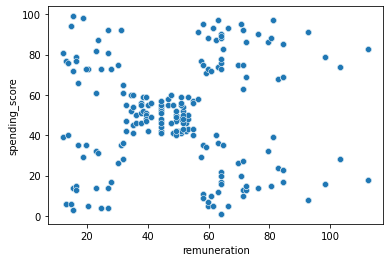

In [10]:
# Create a scatterplot with Seaborn.
sns.scatterplot(x='remuneration',
                y='spending_score',
                data=df2)

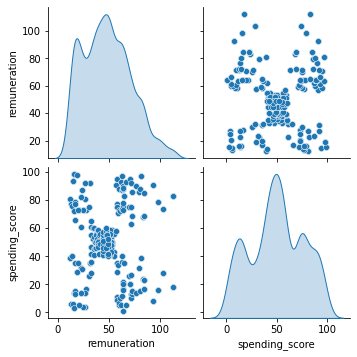

In [11]:
# Create a pairplot with Seaborn.
sns.pairplot(df2,
             diag_kind= 'kde')

## 3. Elbow and silhoutte methods

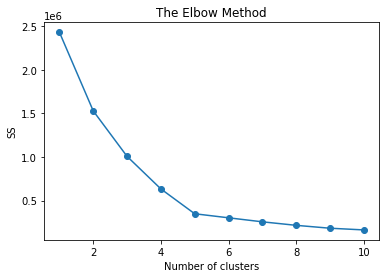

In [12]:
# Determine the number of clusters: Elbow method.
# Import the KMeans class.
from sklearn.cluster import KMeans 

# Elbow chart for us to decide on the number of optimal clusters.
ss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i,
                    init = 'k-means++', 
                    max_iter = 500,
                    n_init = 10,
                    random_state = 42)
    kmeans.fit(df2)
    ss.append(kmeans.inertia_)

plt.plot(range(1, 11),
         ss,
         marker='o')

plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("SS")

plt.show()

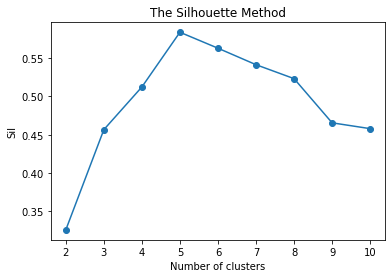

In [13]:
# Determine the number of clusters: Silhouette method.
# Import silhouette_score class from sklearn.
from sklearn.metrics import silhouette_score

# Find the range of clusters to be used using silhouette method.
sil = []
kmax = 10

for k in range(2, kmax+1):
    kmeans_s = KMeans(n_clusters = k).fit(df2)
    labels = kmeans_s.labels_
    sil.append(silhouette_score(df2,
                                labels,
                                metric = 'euclidean'))

# Plot the silhouette method.
plt.plot(range(2, kmax+1),
         sil,
         marker='o')

plt.title("The Silhouette Method")
plt.xlabel("Number of clusters")
plt.ylabel("Sil")

plt.show()

## 4. Evaluate k-means model at different values of *k*

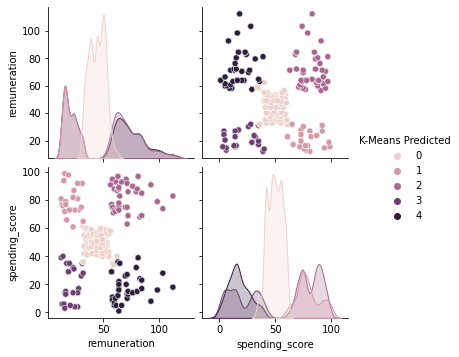

In [14]:
# Both methods indicate k=5 may be the optimal. Use 5 clusters:
kmeans = KMeans(n_clusters = 5,
                max_iter = 500,
                init='k-means++',
                random_state=42).fit(df2)

clusters = kmeans.labels_
df2['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(df2,
             hue='K-Means Predicted',
             diag_kind= 'kde')

In [15]:
# Check the number of observations per predicted class.
df2['K-Means Predicted'].value_counts()

0    774
2    356
4    330
3    271
1    269
Name: K-Means Predicted, dtype: int64

   remuneration  spending_score  K-Means Predicted
0         12.30              39                  3
1         12.30              81                  1
2         13.12               6                  3
3         13.12              77                  1
4         13.94              40                  3


<AxesSubplot:xlabel='remuneration', ylabel='spending_score'>

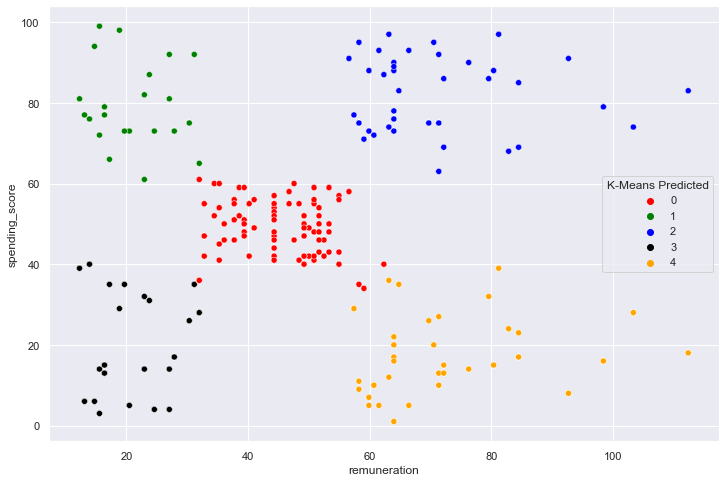

In [16]:
# View the K-Means predicted.
print(df2.head())

# Visualising the clusters.
# Set plot size.
sns.set(rc = {'figure.figsize':(12, 8)})

sns.scatterplot(x='remuneration' , 
                y ='spending_score',
                data=df2 ,
                hue='K-Means Predicted',
                palette=['red', 'green', 'blue', 'black', 'orange'])

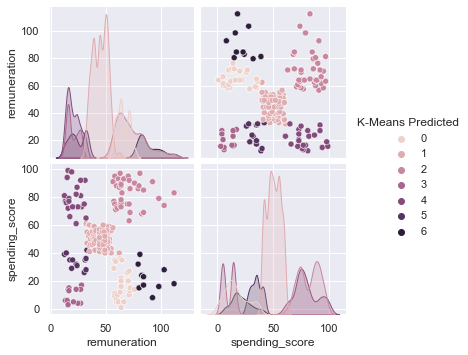

In [20]:
# We can also try 7 clusters seeing that class 2 and 4 above seem to have obvious outliners compared to other classes
kmeans = KMeans(n_clusters = 7,
                max_iter = 500,
                init='k-means++',
                random_state=42).fit(df2)

clusters = kmeans.labels_
df2['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(df2,
             hue='K-Means Predicted',
             diag_kind= 'kde')

In [21]:
# Check the number of observations per predicted class.
df2['K-Means Predicted'].value_counts()

1    731
2    356
4    269
0    221
3    154
5    146
6    123
Name: K-Means Predicted, dtype: int64

   remuneration  spending_score  K-Means Predicted
0         12.30              39                  5
1         12.30              81                  4
2         13.12               6                  3
3         13.12              77                  4
4         13.94              40                  5


<AxesSubplot:xlabel='remuneration', ylabel='spending_score'>

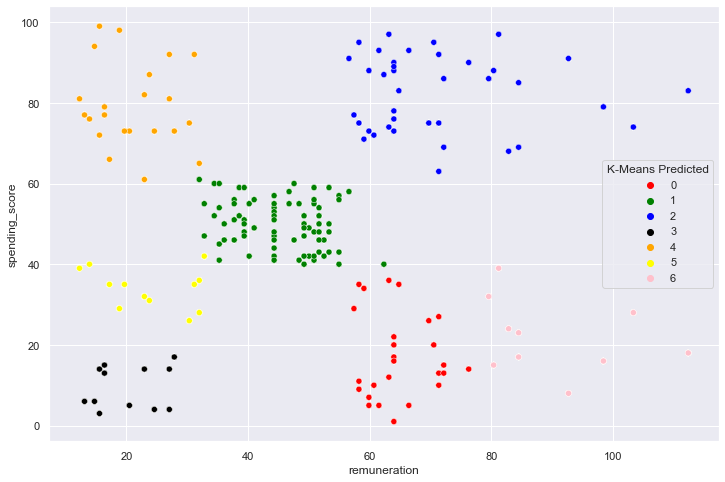

In [22]:
# View the K-Means predicted.
print(df2.head())

# Visualising the clusters.
# Set plot size.
sns.set(rc = {'figure.figsize':(12, 8)})

sns.scatterplot(x='remuneration' , 
                y ='spending_score',
                data=df2 ,
                hue='K-Means Predicted',
                palette=['red', 'green', 'blue', 'black', 'orange','yellow','pink'])

## 5. Fit final model and justify your choice

In [31]:
# Apply the final model.
# I choose 5 clusters. 7 clusters reduce observation size of class 0/3/5/6, and we run a higher risk of over-fitting.
# The elbow and the silhouette  methods both suggest k=5 seems to be the optimal. 
# The number of predicted values per class indicates a better distribution for k=5 than k=7.

## 6.  Interpret the clusters

In [34]:
# The analysis and the plot suggesets that we can group the customers based on their remueration and spending score into 5 groups:
# 1. low pay and low spending
# 2. low pay and high spending
# 3. Medium pay and medium spending
# 4. High pay and high spending
# 5. High pay and low spending

## 7. Discuss: Insights and observations

***Your observations here...***

The clusters suggest we can group the customers into five groups based on the spending and pay patterns. We can analyse each group separately to see if there are clear patterns in other characteristics within groups and create targeted marketing strategy. 

# 

# Week 3 assignment: NLP using Python
Customer reviews were downloaded from the website of Turtle Games. This data will be used to steer the marketing department on how to approach future campaigns. Therefore, the marketing department asked you to identify the 15 most common words used in online product reviews. They also want to have a list of the top 20 positive and negative reviews received from the website. Therefore, you need to apply NLP on the data set.

## Instructions
1. Load and explore the data. 
    1. Sense-check the DataFrame.
    2. You only need to retain the `review` and `summary` columns.
    3. Determine if there are any missing values.
2. Prepare the data for NLP
    1. Change to lower case and join the elements in each of the columns respectively (`review` and `summary`).
    2. Replace punctuation in each of the columns respectively (`review` and `summary`).
    3. Drop duplicates in both columns (`review` and `summary`).
3. Tokenise and create wordclouds for the respective columns (separately).
    1. Create a copy of the DataFrame.
    2. Apply tokenisation on both columns.
    3. Create and plot a wordcloud image.
4. Frequency distribution and polarity.
    1. Create frequency distribution.
    2. Remove alphanumeric characters and stopwords.
    3. Create wordcloud without stopwords.
    4. Identify 15 most common words and polarity.
5. Review polarity and sentiment.
    1. Plot histograms of polarity (use 15 bins) for both columns.
    2. Review the sentiment scores for the respective columns.
6. Identify and print the top 20 positive and negative reviews and summaries respectively.
7. Include your insights and observations.

## 1. Load and explore the data

In [1]:
!pip install WordCloud
!pip install nltk
!pip install textblob

In [3]:
# Import all the necessary packages.
import pandas as pd
import numpy as np
import nltk 
import os 
import matplotlib.pyplot as plt

# nltk.download ('punkt').
# nltk.download ('stopwords').

from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from textblob import TextBlob
from scipy.stats import norm

# Import Counter.
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

In [4]:
# Load the data set as df3.
df3 = pd.read_csv("Reviews_cleaned.csv", usecols = ['review','summary'])

# View DataFrame.
df3.head()

review  \
0  When it comes to a DM's screen, the space on t...   
1  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2  Nice art, nice printing.  Why two panels are f...   
3  Amazing buy! Bought it as a gift for our new d...   
4  As my review of GF9's previous screens these w...   

                                             summary  
0  The fact that 50% of this space is wasted on a...  
1  Another worthless Dungeon Master's screen from...  
2                    pretty, but also pretty useless  
3                                         Five Stars  
4                                         Money trap

In [5]:
# Explore data set.
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   review   2000 non-null   object
 1   summary  2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB


In [6]:
# Determine if there are any missing values.
df3.isna().sum()

review     0
summary    0
dtype: int64

## 2. Prepare the data for NLP
### 2a) Change to lower case and join the elements in each of the columns respectively (review and summary)

In [7]:
# Review: Change all to lower case and join with a space.
df3['review'] = df3['review'].apply(lambda x: " ".join(x.lower() for x in x.split()))

df3['review'].head()

0    when it comes to a dm's screen, the space on t...
1    an open letter to galeforce9*: your unpainted ...
2    nice art, nice printing. why two panels are fi...
3    amazing buy! bought it as a gift for our new d...
4    as my review of gf9's previous screens these w...
Name: review, dtype: object

In [8]:
# Summary: Change all to lower case and join with a space.
df3['summary'] = df3['summary'].apply(lambda x: " ".join(x.lower() for x in x.split()))

df3['summary'].head()

0    the fact that 50% of this space is wasted on a...
1    another worthless dungeon master's screen from...
2                      pretty, but also pretty useless
3                                           five stars
4                                           money trap
Name: summary, dtype: object

### 2b) Replace punctuation in each of the columns respectively (review and summary)

In [82]:
# Replace all the punctuations in review column.
df3['review'] = df3['review'].str.replace('[^\w\s]','')

# View output.
df3['review'].head()

0    when it comes to a dms screen the space on the...
1    an open letter to galeforce9 your unpainted mi...
2    nice art nice printing why two panels are fill...
3    amazing buy bought it as a gift for our new dm...
4    as my review of gf9s previous screens these we...
Name: review, dtype: object

In [83]:
# Replace all the puncuations in summary column.
df3['summary'] = df3['summary'].str.replace('[^\w\s]','')

# View output.
df3['summary'].head()

0    the fact that 50 of this space is wasted on ar...
1    another worthless dungeon masters screen from ...
2                       pretty but also pretty useless
3                                           five stars
4                                           money trap
Name: summary, dtype: object

### 2c) Drop duplicates in both columns

In [84]:
# Drop duplicates in both columns.
dfc=df3.drop_duplicates()
dfc.reset_index(inplace=True,drop=True)
# View DataFrame.
print(dfc.head())

                                              review  \
0  when it comes to a dms screen the space on the...   
1  an open letter to galeforce9 your unpainted mi...   
2  nice art nice printing why two panels are fill...   
3  amazing buy bought it as a gift for our new dm...   
4  as my review of gf9s previous screens these we...   

                                             summary  
0  the fact that 50 of this space is wasted on ar...  
1  another worthless dungeon masters screen from ...  
2                     pretty but also pretty useless  
3                                         five stars  
4                                         money trap  


## 3. Tokenise and create wordclouds

In [85]:
# Create new DataFrame (copy DataFrame).
dft=dfc

# View DataFrame.
dft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1961 entries, 0 to 1960
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   review   1961 non-null   object
 1   summary  1961 non-null   object
dtypes: object(2)
memory usage: 30.8+ KB


In [97]:
# Apply tokenisation to both columns.
dft['review_t'] = dft['review'].apply(word_tokenize)
dft['summary_t'] = dft['summary'].apply(word_tokenize)

# View DataFrame.
dft.head()

review  \
0  when it comes to a dms screen the space on the...   
1  an open letter to galeforce9 your unpainted mi...   
2  nice art nice printing why two panels are fill...   
3  amazing buy bought it as a gift for our new dm...   
4  as my review of gf9s previous screens these we...   

                                             summary  \
0  the fact that 50 of this space is wasted on ar...   
1  another worthless dungeon masters screen from ...   
2                     pretty but also pretty useless   
3                                         five stars   
4                                         money trap   

                                            review_t  \
0  [when, it, comes, to, a, dms, screen, the, spa...   
1  [an, open, letter, to, galeforce9, your, unpai...   
2  [nice, art, nice, printing, why, two, panels, ...   
3  [amazing, buy, bought, it, as, a, gift, for, o...   
4  [as, my, review, of, gf9s, previous, screens, ...   

                                           summary_t  
0  [the, fact, that, 50, of, this, space, is, was...  
1  [another, worthless, dungeon, masters, screen,...  
2               [pretty, but, also, pretty, useless]  
3                                      [five, stars]  
4                                      [money, trap]

In [86]:
# Review: Create a word cloud.
all_reviews = ''
for i in range(dft.shape[0]):
    all_reviews = all_reviews + " "+ dft['review'][i]
    
all_reviews

' when it comes to a dms screen the space on the screen itself is at an absolute premium the fact that 50 of this space is wasted on art and not terribly informative or needed art as well makes it completely useless the only reason that i gave it 2 stars and not 1 was that technically speaking it can at least still stand up to block your notes and dice rolls other than that it drops the ball completely an open letter to galeforce9 your unpainted miniatures are very not bad your spell cards are great your board games are meh your dm screens however are freaking terrible im still waiting for a single screen that isnt polluted with pointless artwork where useful referenceable tables should be once again youve created a single use screen that is only useful when running the storm kings thunder adventure even despite the fact that its geared to that adventure path its usefulness negligible at best i massive swath of the inner panel is wasted on artwork and a bloated overland map which could

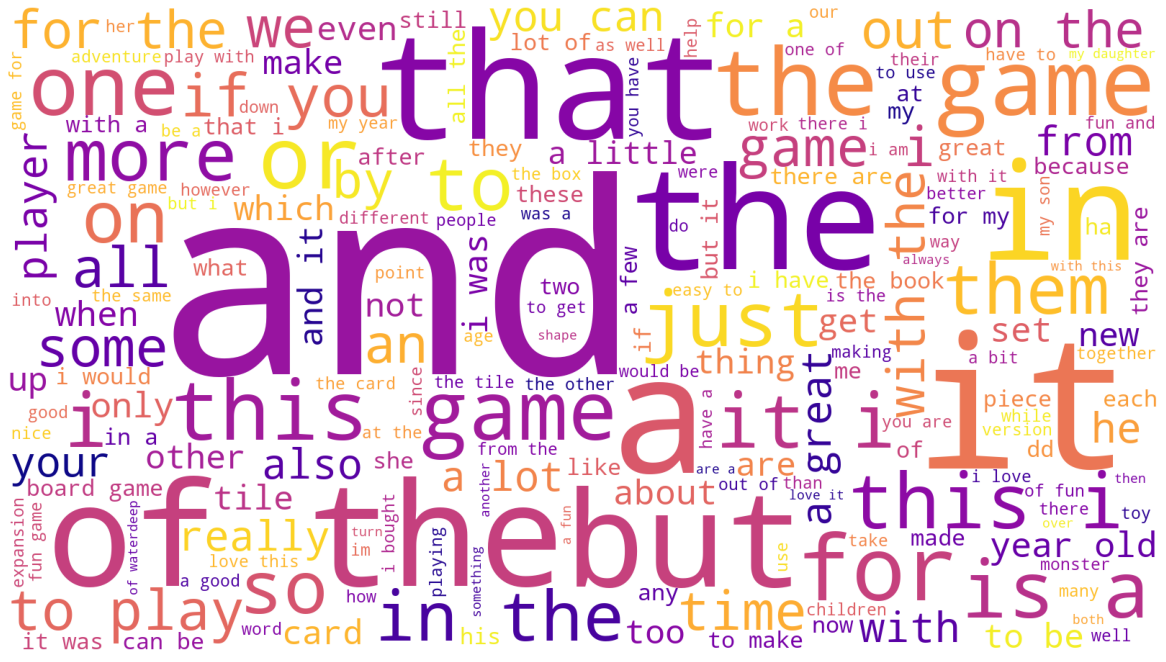

In [87]:
# Review: Plot the WordCloud image.
# Set the colour palette.
import seaborn as sns
sns.set(color_codes=True)

# Create a WordCloud object.
word_cloud = WordCloud(width = 1600, height = 900, 
                background_color ='white',
                colormap = 'plasma', 
                stopwords = 'none',
                min_font_size = 10).generate(all_reviews)

plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(word_cloud) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()

In [88]:
# Summary: Create a word cloud.
all_summaries = ''
for i in range(dft.shape[0]):
    all_summaries = all_summaries + " " + dft['summary'][i]

all_summaries

' the fact that 50 of this space is wasted on art and not terribly informative or needed art  another worthless dungeon masters screen from galeforce9 pretty but also pretty useless five stars money trap five stars best gm screen ever five stars great but could be even better another missed opportunity not a value add to the product line five stars love the map not a general dm screen very weak game fell completely flat five stars good book buckley was a card mommer very advanced but as good as it gets you better know what youre getting into dont bother the worst value ive ever seen not enough product good product but temporary tattoos were good gift huge hit gorgeous pictures five stars wonderful designs wow great coloring book nice book great pictures perfect well done my relaxation beautiful coloring book the pictures are great ive done one and gave it to a  great buy cant wait to work on this book stained glass perfection four stars so beautiful great pictures very nice five stars 

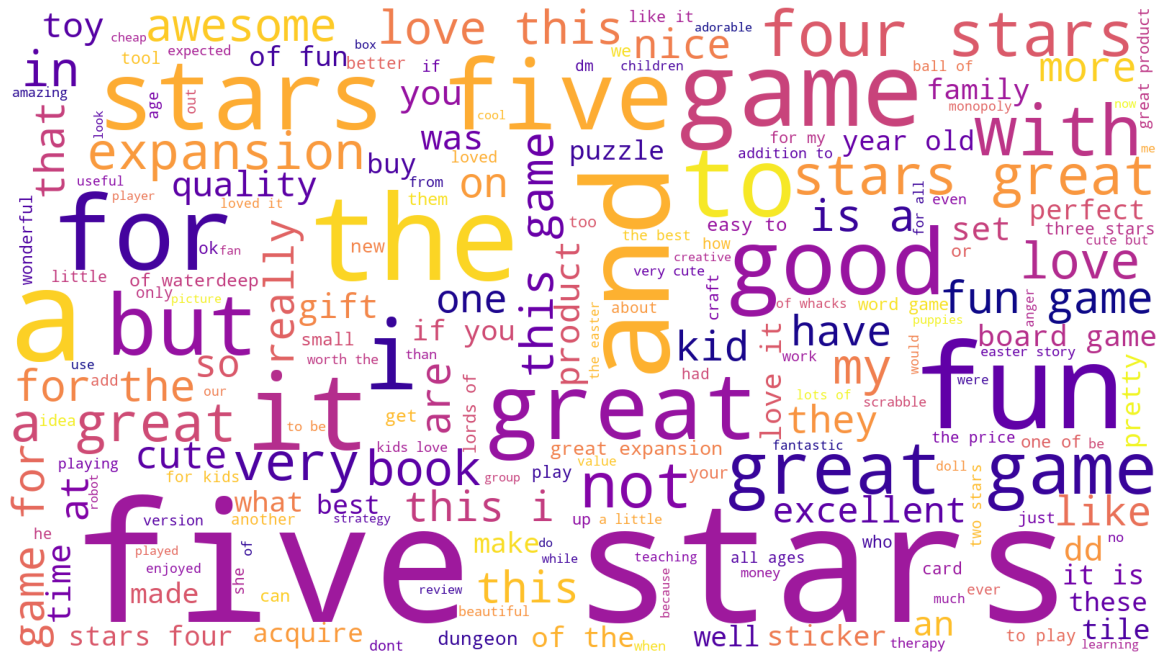

In [89]:
# Summary: Plot the WordCloud image.

# Create a WordCloud object.
word_cloud = WordCloud(width = 1600, height = 900, 
                background_color ='white',
                colormap = 'plasma', 
                stopwords = 'none',
                min_font_size = 10).generate(all_summaries)

plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(word_cloud) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()

## 4. Frequency distribution and polarity
### 4a) Create frequency distribution

In [121]:
# Determine the frequency distribution.
# Import the FreqDist class.
from nltk.probability import FreqDist

# Calculate the frequency distribution of summary and review columns respectively.
summary_freq_dist = nltk.FreqDist(dft['summary_t'].explode())
review_freq_dist = nltk.FreqDist(dft['review_t'].explode())

print(summary_freq_dist.most_common(15))
print(review_freq_dist.most_common(15))

[('stars', 427), ('five', 342), ('game', 319), ('great', 295), ('the', 261), ('a', 240), ('for', 232), ('fun', 218), ('to', 192), ('and', 168), ('it', 150), ('of', 139), ('this', 135), ('is', 103), ('love', 93)]
[('the', 5451), ('and', 3233), ('to', 3162), ('a', 3160), ('of', 2488), ('i', 2090), ('it', 2083), ('is', 1782), ('this', 1776), ('game', 1671), ('for', 1545), ('with', 1265), ('you', 1177), ('in', 1148), ('that', 1067)]


### 4b) Remove alphanumeric characters and stopwords

In [113]:
# Delete all the alpanum for 'summary'.
all_s_tokens = []

for i in range(dft.shape[0]):
    # Add each token to the list.
    all_s_tokens = all_s_tokens + dft['summary_t'][i]
    
s_tokens = [word for word in all_s_tokens if word.isalnum()]   

# Delete all the alpanum for 'review'.
all_r_tokens = []

for i in range(dft.shape[0]):
    # Add each token to the list.
    all_r_tokens = all_r_tokens + dft['review_t'][i]
    
r_tokens = [word for word in all_r_tokens if word.isalnum()]

# Review the first 10 items of the lists to check strings are as expected
print(s_tokens[:10])
print(r_tokens[:10])

['the', 'fact', 'that', '50', 'of', 'this', 'space', 'is', 'wasted', 'on']
['when', 'it', 'comes', 'to', 'a', 'dms', 'screen', 'the', 'space', 'on']


In [118]:
# Remove all the stopwords

nltk.download ('stopwords')
from nltk.corpus import stopwords

# Create a set of English stopwords.
english_stopwords = set(stopwords.words('english'))

# Create a filtered list of tokens without stopwords.
s_tokens2 = [x for x in s_tokens if x.lower() not in english_stopwords]
r_tokens2 = [x for x in r_tokens if x.lower() not in english_stopwords]

# Define an empty string variable.
s_tokens2_string = ''
for value in s_tokens2:
    # Add each filtered token word to the string.
    s_tokens2_string = s_tokens2_string + value + ' '

    
r_tokens2_string = ''
for value in r_tokens2:
    # Add each filtered token word to the string.
    r_tokens2_string = r_tokens2_string + value + ' '
    
# Review the first 10 items of the lists to check strings are as expected
print(s_tokens2[:10])
print(r_tokens2[:10])

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pawel\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['fact', '50', 'space', 'wasted', 'art', 'terribly', 'informative', 'needed', 'art', 'another']
['comes', 'dms', 'screen', 'space', 'screen', 'absolute', 'premium', 'fact', '50', 'space']


### 4c) Create wordcloud without stopwords

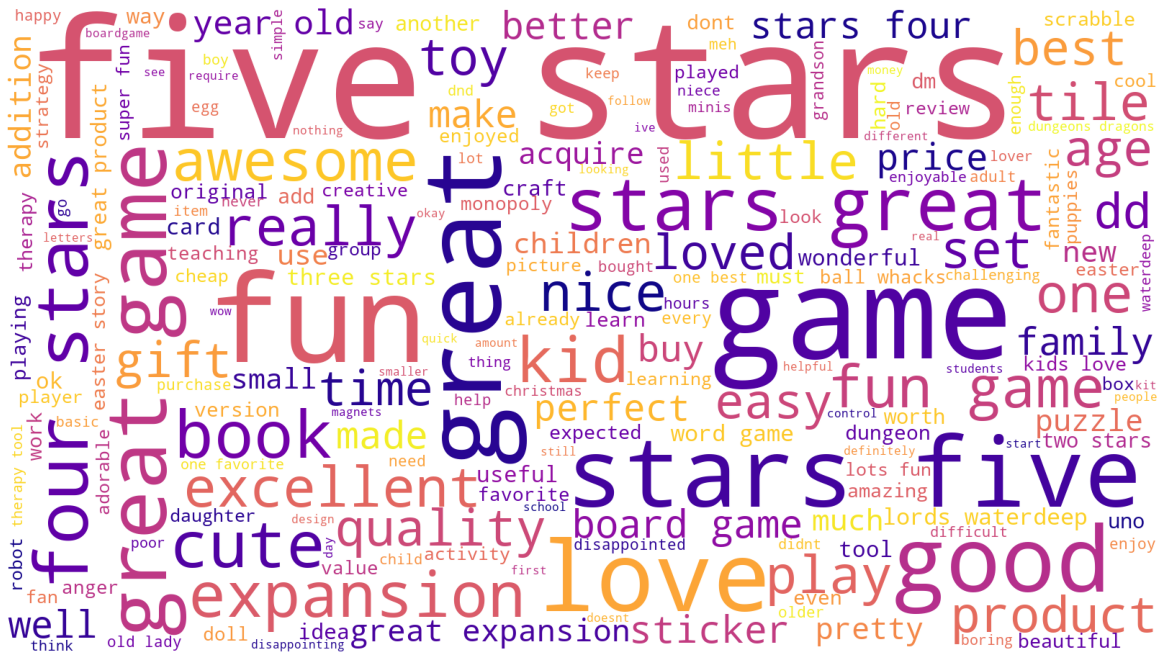

In [122]:
# Create a wordcloud without stop words from the summary column
wordcloud = WordCloud(width = 1600, height = 900, 
                background_color ='white', 
                colormap='plasma', 
                min_font_size = 10).generate(s_tokens2_string) 

# Plot the WordCloud image.                        
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()

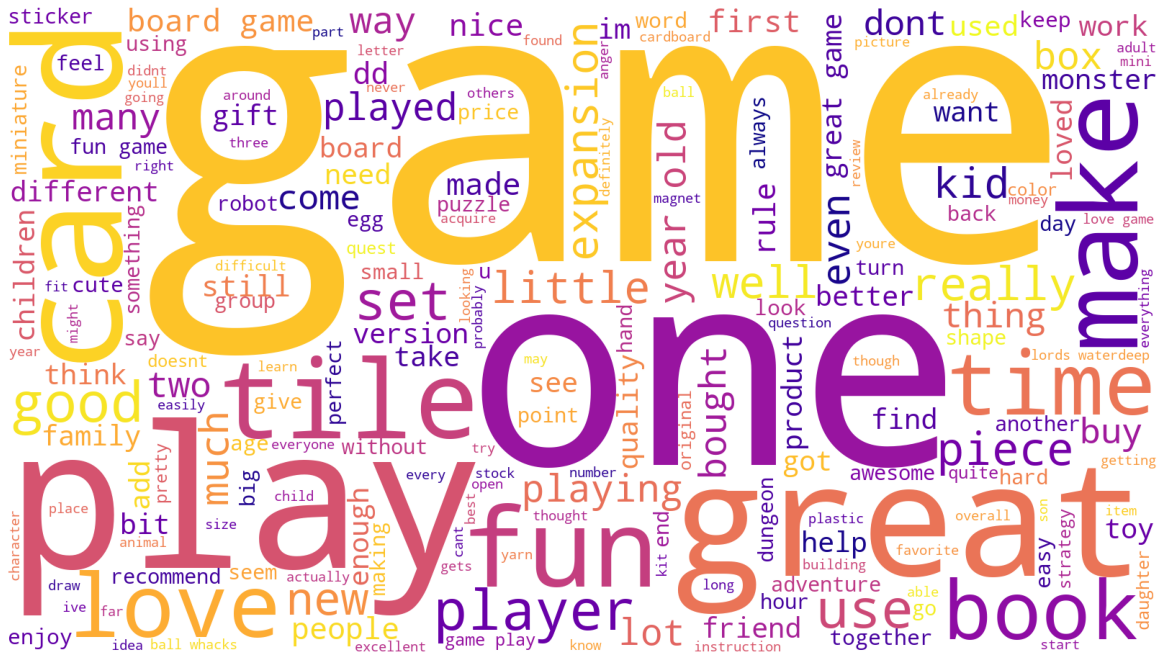

In [123]:
# Create a wordcloud without stop words from the review column
wordcloud = WordCloud(width = 1600, height = 900, 
                background_color ='white', 
                colormap='plasma', 
                min_font_size = 10).generate(r_tokens2_string) 

# Plot the WordCloud image.                        
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(wordcloud)
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()

### 4d) Identify 15 most common words and polarity

In [126]:
# Create a frequency distribution for the cleaned summary tokens list (s_token2)
s_freq_dist = FreqDist(s_tokens2)

# Get the 15 most common words in the s_token2 list and create a dataframe
s_common_words = s_freq_dist.most_common(15)
df_s_common_words = pd.DataFrame(s_common_words, columns=['Word', 'Frequency'])
df_s_common_words.set_index('Word', inplace=True)

# Print the new DataFrame
df_s_common_words

Frequency
Word                
stars            427
five             342
game             319
great            295
fun              218
love              93
good              92
four              58
like              54
expansion         52
kids              50
cute              45
book              43
one               38
awesome           36

In [129]:
# Repeat the above for reviews
r_freq_dist = FreqDist(r_tokens2)

# Get the 15 most common words in the s_token2 list and create a dataframe
r_common_words = r_freq_dist.most_common(15)
df_r_common_words = pd.DataFrame(r_common_words, columns=['Word', 'Frequency'])
df_r_common_words.set_index('Word', inplace=True)

# Print the new DataFrame
df_r_common_words

Frequency
Word             
game         1671
great         580
fun           552
one           530
play          502
like          414
love          323
really        319
get           319
cards         301
tiles         297
time          291
good          289
would         280
book          273

## 5. Review polarity and sentiment: Plot histograms of polarity (use 15 bins) and sentiment scores for the respective columns.

In [130]:
# Provided function.
def generate_polarity(comment):
    '''Extract polarity score (-1 to +1) for each comment'''
    return TextBlob(comment).sentiment[0]

In [148]:
# Create seperate DataFrames for tokenised 'summary' and 'review' text

# Start with 'summary' texts
df_s=dft['summary_t'].values

df_s_cleaned = [[y.lower() for y in x if y.lower() not in english_stopwords and y.isalpha()] for x in df_s]

df_s_cleaned

[['fact',
  'space',
  'wasted',
  'art',
  'terribly',
  'informative',
  'needed',
  'art'],
 ['another', 'worthless', 'dungeon', 'masters', 'screen'],
 ['pretty', 'also', 'pretty', 'useless'],
 ['five', 'stars'],
 ['money', 'trap'],
 ['five', 'stars'],
 ['best', 'gm', 'screen', 'ever'],
 ['five', 'stars'],
 ['great', 'could', 'even', 'better'],
 ['another', 'missed', 'opportunity', 'value', 'add', 'product', 'line'],
 ['five', 'stars'],
 ['love', 'map'],
 ['general', 'dm', 'screen'],
 ['weak', 'game'],
 ['fell', 'completely', 'flat'],
 ['five', 'stars'],
 ['good', 'book'],
 ['buckley', 'card', 'mommer'],
 ['advanced', 'good', 'gets'],
 ['better', 'know', 'youre', 'getting'],
 ['dont', 'bother'],
 ['worst', 'value', 'ive', 'ever', 'seen'],
 ['enough', 'product'],
 ['good', 'product'],
 ['temporary', 'tattoos', 'good', 'gift'],
 ['huge', 'hit'],
 ['gorgeous', 'pictures'],
 ['five', 'stars'],
 ['wonderful', 'designs'],
 ['wow', 'great', 'coloring', 'book'],
 ['nice', 'book'],
 ['great'

In [152]:
# Perform sentiment analysis
df_s_polarity = {" ".join(_) : sia.polarity_scores(" ".join(_)) for _ in df_s_cleaned}

print(df_s_polarity)

print(pd.DataFrame(df_s_polarity))

{'fact space wasted art terribly informative needed art': {'neg': 0.531, 'neu': 0.469, 'pos': 0.0, 'compound': -0.7783}, 'another worthless dungeon masters screen': {'neg': 0.42, 'neu': 0.58, 'pos': 0.0, 'compound': -0.4404}, 'pretty also pretty useless': {'neg': 0.275, 'neu': 0.098, 'pos': 0.627, 'compound': 0.5574}, 'five stars': {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, 'money trap': {'neg': 0.697, 'neu': 0.303, 'pos': 0.0, 'compound': -0.3182}, 'best gm screen ever': {'neg': 0.0, 'neu': 0.417, 'pos': 0.583, 'compound': 0.6369}, 'great could even better': {'neg': 0.0, 'neu': 0.222, 'pos': 0.778, 'compound': 0.7906}, 'another missed opportunity value add product line': {'neg': 0.193, 'neu': 0.351, 'pos': 0.456, 'compound': 0.4588}, 'love map': {'neg': 0.0, 'neu': 0.192, 'pos': 0.808, 'compound': 0.6369}, 'general dm screen': {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, 'weak game': {'neg': 0.744, 'neu': 0.256, 'pos': 0.0, 'compound': -0.4404}, 'fell completely 

In [155]:
# Create Dataframes with sentiment scores and polarity
polarity_s = pd.DataFrame(df_s_polarity).T
polarity_s['polarity'] = polarity_s.index.map(generate_polarity)

# View the DataFrame.
polarity_s

neg    neu    pos  \
fact space wasted art terribly informative need...  0.531  0.469  0.000   
another worthless dungeon masters screen            0.420  0.580  0.000   
pretty also pretty useless                          0.275  0.098  0.627   
five stars                                          0.000  1.000  0.000   
money trap                                          0.697  0.303  0.000   
...                                                   ...    ...    ...   
fun card game people like words                     0.000  0.408  0.592   
sort card game equivalent scrabble lot easier       0.000  0.682  0.318   
great game keep mind active                         0.000  0.306  0.694   
great mind game                                     0.000  0.328  0.672   
perfect word game mixed ages mom                    0.000  0.575  0.425   

                                                    compound  polarity  
fact space wasted art terribly informative need...   -0.7783 -0.600000  
another worthless dungeon masters screen             -0.4404 -0.800000  
pretty also pretty useless                            0.5574  0.000000  
five stars                                            0.0000  0.000000  
money trap                                           -0.3182  0.000000  
...                                                      ...       ...  
fun card game people like words                       0.7003 -0.050000  
sort card game equivalent scrabble lot easier         0.4215 -0.400000  
great game keep mind active                           0.7783  0.088889  
great mind game                                       0.6249  0.200000  
perfect word game mixed ages mom                      0.5719  0.200000  

[1292 rows x 5 columns]

In [156]:
# Repeat for 'review'
df_r=dft['review_t'].values

df_r_cleaned = [[y.lower() for y in x if y.lower() not in english_stopwords and y.isalpha()] for x in df_r]

df_r_cleaned

[['comes',
  'dms',
  'screen',
  'space',
  'screen',
  'absolute',
  'premium',
  'fact',
  'space',
  'wasted',
  'art',
  'terribly',
  'informative',
  'needed',
  'art',
  'well',
  'makes',
  'completely',
  'useless',
  'reason',
  'gave',
  'stars',
  'technically',
  'speaking',
  'least',
  'still',
  'stand',
  'block',
  'notes',
  'dice',
  'rolls',
  'drops',
  'ball',
  'completely'],
 ['open',
  'letter',
  'unpainted',
  'miniatures',
  'bad',
  'spell',
  'cards',
  'great',
  'board',
  'games',
  'meh',
  'dm',
  'screens',
  'however',
  'freaking',
  'terrible',
  'im',
  'still',
  'waiting',
  'single',
  'screen',
  'isnt',
  'polluted',
  'pointless',
  'artwork',
  'useful',
  'referenceable',
  'tables',
  'youve',
  'created',
  'single',
  'use',
  'screen',
  'useful',
  'running',
  'storm',
  'kings',
  'thunder',
  'adventure',
  'even',
  'despite',
  'fact',
  'geared',
  'adventure',
  'path',
  'usefulness',
  'negligible',
  'best',
  'massive',


In [167]:
df_r_polarity = {" ".join(_) : sia.polarity_scores(" ".join(_)) for _ in df_r_cleaned}

print(df_r_polarity)

pd.DataFrame(df_r_polarity)

{'comes dms screen space screen absolute premium fact space wasted art terribly informative needed art well makes completely useless reason gave stars technically speaking least still stand block notes dice rolls drops ball completely': {'neg': 0.291, 'neu': 0.661, 'pos': 0.048, 'compound': -0.8932}, 'open letter unpainted miniatures bad spell cards great board games meh dm screens however freaking terrible im still waiting single screen isnt polluted pointless artwork useful referenceable tables youve created single use screen useful running storm kings thunder adventure even despite fact geared adventure path usefulness negligible best massive swath inner panel wasted artwork bloated overland map could easily reduced single panel size table nighuseless short stop making crap dm screens': {'neg': 0.186, 'neu': 0.537, 'pos': 0.276, 'compound': 0.8434}, 'nice art nice printing two panels filled general forgotten realms map beyond one blue ocean waste dont understand cant make dm screens

comes dms screen space screen absolute premium fact space wasted art terribly informative needed art well makes completely useless reason gave stars technically speaking least still stand block notes dice rolls drops ball completely  \
neg                                                  0.2910                                                                                                                                                                                          
neu                                                  0.6610                                                                                                                                                                                          
pos                                                  0.0480                                                                                                                                                                                          
compound                                            -0.8932                                                                                                                                                                                          

          open letter unpainted miniatures bad spell cards great board games meh dm screens however freaking terrible im still waiting single screen isnt polluted pointless artwork useful referenceable tables youve created single use screen useful running storm kings thunder adventure even despite fact geared adventure path usefulness negligible best massive swath inner panel wasted artwork bloated overland map could easily reduced single panel size table nighuseless short stop making crap dm screens  \
neg                                                  0.1860                                                                                                                                                                                                                                                                                                                                                                                                                                                                 
neu                                                  0.5370                                                                                                                                                                                                                                                                                                                                                                                                                                                                 
pos                                                  0.2760                                                                                                                                                                                                                                                                                                                                                                                                                                                                 
compound                                             0.8434                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

          nice art nice printing two panels filled general forgotten realms map beyond one blue ocean waste dont understand cant make dm screens useful kinds adventures rather solely specific adventure youre supposed able transpose a

In [168]:
# Create Dataframes with sentiment scores and polarity
polarity_r = pd.DataFrame(df_r_polarity).T
polarity_r['polarity'] = polarity_r.index.map(generate_polarity)

# View the DataFrame.
polarity_r

neg    neu    pos  \
comes dms screen space screen absolute premium ...  0.291  0.661  0.048   
open letter unpainted miniatures bad spell card...  0.186  0.537  0.276   
nice art nice printing two panels filled genera...  0.181  0.588  0.230   
amazing buy bought gift new dm perfect              0.000  0.278  0.722   
review previous screens completely unnecessary ...  0.394  0.606  0.000   
...                                                   ...    ...    ...   
retired find great way stay alert spelling voca...  0.000  0.574  0.426   
perfect word game mixed ages mom perhaps giving...  0.000  0.440  0.560   
great game think would like first received turn...  0.000  0.532  0.468   
great game keeps mind nimble                        0.000  0.494  0.506   
game fun lot like scrabble without little tiles...  0.000  0.433  0.567   

                                                    compound  polarity  
comes dms screen space screen absolute premium ...   -0.8932 -0.242857  
open letter unpainted miniatures bad spell card...    0.8434 -0.019468  
nice art nice printing two panels filled genera...    0.7281  0.118243  
amazing buy bought gift new dm perfect                0.8860  0.578788  
review previous screens completely unnecessary ...   -0.7063 -0.316667  
...                                                      ...       ...  
retired find great way stay alert spelling voca...    0.8860  0.400000  
perfect word game mixed ages mom perhaps giving...    0.9137  0.168750  
great game think would like first received turn...    0.9062  0.158333  
great game keeps mind nimble                          0.6249  0.200000  
game fun lot like scrabble without little tiles...    0.7815 -0.095833  

[1927 rows x 5 columns]

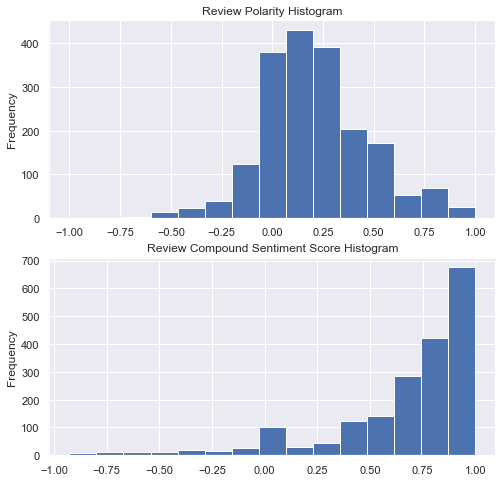

In [174]:
# Review: Create a histogram plot with bins = 15.
# Histogram of polarity
# Histogram of sentiment score
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 8))
polarity_r['polarity'].plot.hist(ax=axes[0], bins=15)
polarity_r['compound'].plot.hist(ax=axes[1], bins=15)
axes[0].set_title('Review Polarity Histogram')
axes[1].set_title('Review Compound Sentiment Score Histogram')
plt.show()

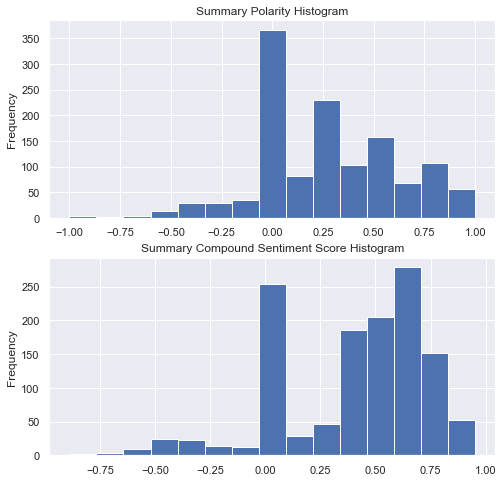

In [175]:
# Summary: Create a histogram plot with bins = 15.
# Histogram of polarity
# Histogram of sentiment score
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 8))
polarity_s['polarity'].plot.hist(ax=axes[0], bins=15)
polarity_s['compound'].plot.hist(ax=axes[1], bins=15)
axes[0].set_title('Summary Polarity Histogram')
axes[1].set_title('Summary Compound Sentiment Score Histogram')
plt.show()

## 6. Identify top 20 positive and negative reviews and summaries respectively

In [169]:
# Top 20 negative reviews.
polarity_r.sort_values('neg', ascending=0).head(20)


neg    neu    pos  \
difficult                                           1.000  0.000  0.000   
crappy cardboard ghost original hard believe sh...  0.723  0.157  0.120   
incomplete kit disappointing                        0.615  0.385  0.000   
found directions difficult                          0.556  0.444  0.000   
rather hard year old alone                          0.531  0.469  0.000   
yearold granddaughter frustrated discouraged at...  0.520  0.359  0.121   
got product damaged condition                       0.492  0.508  0.000   
uno questions anger okay way discuss anger gets...  0.491  0.427  0.081   
doesnt love puppies great instructions pictures...  0.477  0.286  0.236   
bought thinking would really fun disappointed r...  0.455  0.427  0.118   
im sorry find product boring frank juvenile         0.419  0.581  0.000   
hard put together                                   0.412  0.588  0.000   
hard complicated make                               0.412  0.588  0.000   
flimsy get pay                                      0.412  0.588  0.000   
fun way kids talk anger identify okay feel angry    0.407  0.291  0.302   
review previous screens completely unnecessary ...  0.394  0.606  0.000   
im ot intended using aggressive kiddos used eve...  0.389  0.611  0.000   
cute idea horrible execution want child tears b...  0.381  0.433  0.186   
game hard frustrating first fun get hang            0.371  0.345  0.284   
smaller thought kind disappointed                   0.365  0.235  0.400   

                                                    compound  polarity  
difficult                                            -0.3612 -0.500000  
crappy cardboard ghost original hard believe sh...   -0.8885 -0.305556  
incomplete kit disappointing                         -0.4939 -0.600000  
found directions difficult                           -0.3612 -0.500000  
rather hard year old alone                           -0.3400 -0.095833  
yearold granddaughter frustrated discouraged at...   -0.8360 -0.450000  
got product damaged condition                        -0.4404  0.000000  
uno questions anger okay way discuss anger gets...   -0.8625 -0.288095  
doesnt love puppies great instructions pictures...   -0.5207  0.533333  
bought thinking would really fun disappointed r...   -0.8513 -0.159524  
im sorry find product boring frank juvenile          -0.3818 -0.583333  
hard put together                                    -0.1027 -0.291667  
hard complicated make                                -0.1027 -0.395833  
flimsy get pay                                       -0.1027  0.000000  
fun way kids talk anger identify okay feel angry     -0.4215 -0.100000  
review previous screens completely unnecessary ...   -0.7063 -0.316667  
im ot intended using aggressive kiddos used eve...   -0.7184 -0.316667  
cute idea horrible execution want child tears b...   -0.6705 -0.180000  
game hard frustrating first fun get hang              0.0000 -0.108333  
smaller thought kind disappointed                     0.0772 -0.050000

In [170]:
# Top 20 negative summaries.
polarity_s.sort_values('neg', ascending=0).head(20)

neg    neu   pos  \
frustrating                                         1.000  0.000  0.00   
disappointed                                        1.000  0.000  0.00   
meh                                                 1.000  0.000  0.00   
boring                                              1.000  0.000  0.00   
disappointing                                       1.000  0.000  0.00   
worn                                                1.000  0.000  0.00   
defective poor qc                                   0.857  0.143  0.00   
sided die                                           0.796  0.204  0.00   
bad expecting                                       0.778  0.222  0.00   
uno angry                                           0.767  0.233  0.00   
mad dragon                                          0.762  0.238  0.00   
weak game                                           0.744  0.256  0.00   
damaged product                                     0.744  0.256  0.00   
sadly cheap                                         0.737  0.263  0.00   
bad set limited applicability                       0.730  0.270  0.00   
crappy cardboard ghost original hard believe sh...  0.723  0.157  0.12   
students fight                                      0.722  0.278  0.00   
faulty product                                      0.697  0.303  0.00   
small boring                                        0.697  0.303  0.00   
money trap                                          0.697  0.303  0.00   

                                                    compound  polarity  
frustrating                                          -0.4404 -0.400000  
disappointed                                         -0.4767 -0.750000  
meh                                                  -0.0772  0.000000  
boring                                               -0.3182 -1.000000  
disappointing                                        -0.4939 -0.600000  
worn                                                 -0.2960  0.000000  
defective poor qc                                    -0.7184 -0.400000  
sided die                                            -0.5994  0.000000  
bad expecting                                        -0.5423 -0.700000  
uno angry                                            -0.5106 -0.500000  
mad dragon                                           -0.4939 -0.625000  
weak game                                            -0.4404 -0.387500  
damaged product                                      -0.4404  0.000000  
sadly cheap                                          -0.4215  0.400000  
bad set limited applicability                        -0.6597 -0.385714  
crappy cardboard ghost original hard believe sh...   -0.8885 -0.305556  
students fight                                       -0.3818  0.000000  
faulty product                                       -0.3182  0.000000  
small boring                                         -0.3182 -0.625000  
money trap                                           -0.3182  0.000000

In [179]:
# Top 20 positive reviews.
polarity_r.sort_values('pos', ascending=0).head(20)

neg  neu  pos  compound  polarity
liked                 0.0  0.0  1.0    0.4215  0.600000
great                 0.0  0.0  1.0    0.6249  0.800000
satisfied thanks      0.0  0.0  1.0    0.6908  0.350000
awesome gift          0.0  0.0  1.0    0.7906  1.000000
satisfied             0.0  0.0  1.0    0.4215  0.500000
super fun             0.0  0.0  1.0    0.8020  0.316667
love                  0.0  0.0  1.0    0.6369  0.500000
nice                  0.0  0.0  1.0    0.4215  0.600000
cool                  0.0  0.0  1.0    0.3182  0.350000
fun                   0.0  0.0  1.0    0.5106  0.300000
good                  0.0  0.0  1.0    0.4404  0.700000
fine                  0.0  0.0  1.0    0.2023  0.416667
fun enjoyable         0.0  0.0  1.0    0.7351  0.400000
loved loved loved     0.0  0.0  1.0    0.9136  0.700000
fun entertaining      0.0  0.0  1.0    0.7351  0.400000
super cute            0.0  0.0  1.0    0.7845  0.416667
cute                  0.0  0.0  1.0    0.4588  0.500000
inspiring creativity  0.0  0.0  1.0    0.6597  0.500000
love helpful          0.0  0.0  1.0    0.7906  0.500000
ok                    0.0  0.0  1.0    0.2960  0.500000

In [180]:
# Top 20 positive summaries.
polarity_s.sort_values('pos', ascending=0).head(20)

neg  neu  pos  compound  polarity
fun useful         0.0  0.0  1.0    0.7351      0.30
good               0.0  0.0  1.0    0.4404      0.70
nice               0.0  0.0  1.0    0.4215      0.60
fun cute           0.0  0.0  1.0    0.7430      0.40
ok great           0.0  0.0  1.0    0.7430      0.65
perfect gift       0.0  0.0  1.0    0.7650      1.00
great              0.0  0.0  1.0    0.6249      0.80
ok best            0.0  0.0  1.0    0.7506      0.75
fun                0.0  0.0  1.0    0.5106      0.30
great gift         0.0  0.0  1.0    0.7906      0.80
great helper       0.0  0.0  1.0    0.7579      0.80
cute               0.0  0.0  1.0    0.4588      0.50
ok ok              0.0  0.0  1.0    0.5267      0.50
happy gift         0.0  0.0  1.0    0.7650      0.80
love play friends  0.0  0.0  1.0    0.8658      0.50
satisfied          0.0  0.0  1.0    0.4215      0.50
good fun           0.0  0.0  1.0    0.7351      0.50
fun fun fun        0.0  0.0  1.0    0.8720      0.30
engaging           0.0  0.0  1.0    0.3400      0.40
fantastic          0.0  0.0  1.0    0.5574      0.40

## 7. Discuss: Insights and observations

***Your observations here...***

The wordclouds/most common words in the reviews and summaries, and the histograms show that consumer sentiment towards the company's products is overall positive.

Reading the top 20 negtive reviews and summaries, there seems to a lot of complaints about the product instructions being complicated/difficult, children getting frustrated or incomplete/faulty products being delivered. This shows that the company should look into their product design - perhaps it needs to be more age appropriate - as well as quality control.

The top positive reviews and summaries show words such as 'good gift', 'cute','fun' - this shows that a lot of customers are buying the products as presents and perhaps the company can offer customers gift packaging to enhance this point. In marketing compaigns they could emphasise the 'fun' aspect even more.  

A wordcloud of the most common negative/positive words would also have been useful in this analysis. 

# 